# Setting up finite difference for wave equation

# Grid dispersion
Spatial constraint (P15 IFOS2D mannual)
$$\large dh \leq \frac{\lambda_{min}}{n}\, =\, \frac{v_{min}}{nf_{max}} $$
where n is a constant related to the order of FD.


# CFL (Courant-Friedichs-Lewy) criterion
Temporal constraints for 2D grid (P18 IFOS2D mannual)
$$\large dt \leq \frac{dh}{\sqrt{2}hv_{max}}$$
where dh is the grid size; h is a constrant related to the order of FD.

FD Order | n | h|
---|---|---|
2nd | 12 | 1.
4th | 8|7/6
6th | 6| 149/120
8th | 5| 2161/1680

# $\large {f_{Nquist}, \,f_{max} \text{and } f_c}$

Let $f_c$ be the central frequency of Ricker wavelet and $f_{max}$ be the max frequency of source wavelet.

If using Ricker as the source wavelet, it must be satisfied that
$$\large f_{Nquist} \geq f_{max} = af_c $$
or,
$$\large dt \leq \frac{1}{2af_c}$$
where a is $\large a=\frac{f_{max}}{f_c}$. Let $\large r = \frac{Amp\big(f_{max}\big)}{Max\big(Amp\big)}$. When $f_{max}>2.76f_c$, \, $Amp/Amp\big(f_c\big) < 10^{-2}$. To get a proper Ricker wavelet, $\, f_{max}$ should be at least $\,2.76\,f_c$ for numerial modeling. Therefore,

$$\large dh \leq \frac{v_{min}}{naf_c}, \,  \large dt \leq min \bigg( \frac{1}{2a \, f_c}, \, \frac{dh}{\sqrt{2}hv_{max}}\bigg)$$

If $\large dh = \frac{v_{min}}{naf_c}$, $\large \frac{dh}{\sqrt{2}hv_{max}} = \frac{1}{\sqrt{2}anhv_{max}/v_{min}} < \frac{1}{2a \, f_c}$. Hence,
$$ \large dh = \frac{v_{min}}{naf_c}, dt =  \frac{v_{min}}{\sqrt{2}anhv_{max}}$$

a | r |
---| ---|
2.21 | $10^{-1}$ 
2.76 | $10^{-2}$  
3.20 | $10^{-3}$
3.57 | $10^{-4}$ 
3.90 | $10^{-5}$

f_max/f_c =      1.00,     1.50,     2.00,     2.50,     3.00,     3.50,     4.00,     4.50,     5.00
r         =  1.00e+00, 6.45e-01, 1.99e-01, 3.28e-02, 3.02e-03, 1.59e-04, 4.89e-06, 8.84e-08, 9.44e-10


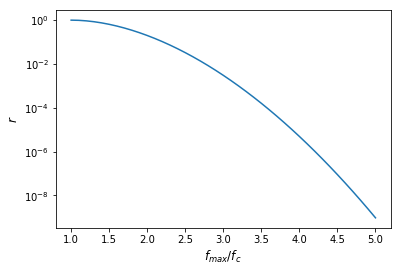

In [3]:
# compute r(a)
import numpy as np
import matplotlib.pyplot as plt
a = np.arange(1, 5.1, 0.1)
r = a**2 * np.exp(1-a**2)
aPrint = ', '.join(['{:8.2f}'.format(i) for i in a[::5]])
rPrint = ', '.join(['{:.2e}'.format(i) for i in r[::5]])
print('f_max/f_c =  {:s}'.format(aPrint))
print('r         =  {:s}'.format(rPrint))
plt.xlabel(r'$f_{max}/f_c$', fontsize='large')
plt.ylabel(r'$r$',  fontsize='large')
plt.semilogy(a, r)
plt.show()

In [2]:
# solve for a (or f/fmax) that meets the specified amplitude ratio (or A/Amax)
from scipy.optimize import fsolve
def F(x, *eps, ):
    return x**2 * np.exp(1-x**2)-eps
tol = np.logspace(-1, -5, 5)
roots = np.zeros(len(tol))
for i, eps in enumerate(tol):
    roots[i] = fsolve(F, 2, eps)
print('r = {:s}'.format(', '.join(['{:.2e}'.format(i)  for i in tol])))
print('a = {:s}'.format(', '.join(['{:.2e}'.format(i)  for i in roots])))

r = 1.00e-01, 1.00e-02, 1.00e-03, 1.00e-04, 1.00e-05
a = 2.21e+00, 2.76e+00, 3.20e+00, 3.57e+00, 3.90e+00
